In [176]:
#importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn as sk
#bibliotecas para decision tree e xboost
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import shap

In [29]:
pd.set_option('display.max_rows', 100)  # Increase max rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Avoid line breaks
pd.set_option('display.max_colwidth', None)  # Show full content in cells

In [4]:
#abrir o arquivo
pwd = os.getcwd()

#carregar o arquivo
df = pd.read_csv(pwd + '/taxis.csv')

#ver 50 linhas
df.head(50)

pickup              dropoff  passengers  distance  fare  \
0   2019-03-23 20:21:09  2019-03-23 20:27:24           1      1.60   7.0   
1   2019-03-04 16:11:55  2019-03-04 16:19:00           1      0.79   5.0   
2   2019-03-27 17:53:01  2019-03-27 18:00:25           1      1.37   7.5   
3   2019-03-10 01:23:59  2019-03-10 01:49:51           1      7.70  27.0   
4   2019-03-30 13:27:42  2019-03-30 13:37:14           3      2.16   9.0   
5   2019-03-11 10:37:23  2019-03-11 10:47:31           1      0.49   7.5   
6   2019-03-26 21:07:31  2019-03-26 21:17:29           1      3.65  13.0   
7   2019-03-22 12:47:13  2019-03-22 12:58:17           0      1.40   8.5   
8   2019-03-23 11:48:50  2019-03-23 12:06:14           1      3.63  15.0   
9   2019-03-08 16:18:37  2019-03-08 16:26:57           1      1.52   8.0   
10  2019-03-16 10:02:25  2019-03-16 10:22:29           1      3.90  17.0   
11  2019-03-20 19:39:42  2019-03-20 19:45:36           1      1.53   6.5   
12  2019-03-18 21:27:14  2019-03-18 21:34:16           1      1.05   6.5   
13  2019-03-19 07:55:25  2019-03-19 08:09:17           1      1.75  10.5   
14  2019-03-27 12:13:34  2019-03-27 12:25:48           0      2.90  11.5   
15  2019-03-16 17:53:34  2019-03-16 18:13:57           3      2.09  13.5   
16  2019-03-15 12:36:05  2019-03-15 12:54:28           1      2.12  13.0   
17  2019-03-23 20:50:49  2019-03-23 21:02:07           1      2.60  10.5   
18  2019-03-27 06:28:36  2019-03-27 06:38:10           1      2.18   9.5   
19  2019-03-25 22:04:25  2019-03-25 22:11:30           6      1.08   6.5   
20  2019-03-21 03:37:34  2019-03-21 03:44:13           1      1.07   6.5   
21  2019-03-25 23:05:54  2019-03-25 23:11:13           1      0.80   5.5   
22  2019-03-28 17:20:54  2019-03-28 17:55:57           1      9.82  31.5   
23  2019-03-04 12:15:39  2019-03-04 12:26:53           5      1.09   8.5   
24  2019-03-24 09:53:28  2019-03-24 10:01:22           5      2.89   9.5   
25  2019-03-25 08:01:01  2019-03-25 08:13:27           1      1.90  10.0   
26  2019-03-03 02:45:36  2019-03-03 03:02:14           1      3.35  13.5   
27  2019-03-16 20:30:36  2019-03-16 20:46:22           1      2.60  12.5   
28  2019-03-20 12:25:31  2019-03-20 12:45:02           1      4.71  17.5   
29  2019-03-06 08:09:03  2019-03-06 08:27:11           1      0.92  12.0   
30  2019-03-10 15:14:20  2019-03-10 15:20:17           1      1.84   7.0   
31  2019-03-01 02:55:55  2019-03-01 02:57:59           3      0.74   4.0   
32  2019-03-17 19:24:50  2019-03-17 19:29:58           1      0.62   5.5   
33  2019-03-20 22:29:32  2019-03-20 22:32:24           2      0.65   4.5   
34  2019-03-21 10:48:02  2019-03-21 10:57:45           2      0.87   7.5   
35  2019-03-01 17:39:58  2019-03-01 18:04:46           1      3.06  17.0   
36  2019-03-22 17:28:51  2019-03-22 17:33:51           1      1.10   5.5   
37  2019-03-21 18:41:58  2019-03-21 19:15:25           1      3.13  20.5   
38  2019-03-18 16:03:14  2019-03-18 16:10:36           2      1.13   6.5   
39  2019-03-25 22:50:56  2019-03-25 22:59:51           1      2.47  10.0   
40  2019-03-07 15:15:46  2019-03-07 15:50:14           1      7.51  27.0   
41  2019-03-24 18:42:56  2019-03-24 19:09:00           0      4.50  20.0   
42  2019-03-30 23:59:14  2019-03-30 23:59:17           1      0.00  80.0   
43  2019-03-27 19:39:16  2019-03-27 20:00:26           1      9.50  28.0   
44  2019-03-14 07:19:29  2019-03-14 07:45:51           1      9.37  29.5   
45  2019-03-07 11:19:21  2019-03-07 11:39:09           1      0.80  12.5   
46  2019-03-20 11:40:59  2019-03-20 12:06:41           2      4.70  20.0   
47  2019-03-13 06:17:45  2019-03-13 06:21:54           2      1.15   5.5   
48  2019-03-07 16:49:01  2019-03-07 16:57:07           1      1.30   7.0   
49  2019-03-04 21:35:00  2019-03-04 21:53:42           1      4.87  17.5   

      tip  tolls   total   color      payment                    pickup_zone  \
0    2.15   0.00   12.95  yellow  credit card               

In [69]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls', 'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough', 'pickup_datetime', 'dropoff_datetime'], dtype='object')

In [5]:
#verificar o tipo de dado
df.dtypes


pickup              object
dropoff             object
passengers           int64
distance           float64
fare               float64
tip                float64
tolls              float64
total              float64
color               object
payment             object
pickup_zone         object
dropoff_zone        object
pickup_borough      object
dropoff_borough     object
dtype: object

In [7]:
#converter tipo de dado para data
df['pickup_datetime'] = pd.to_datetime(df['pickup'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff'])

In [8]:
#verificar o tipo de dado
df.dtypes

pickup                      object
dropoff                     object
passengers                   int64
distance                   float64
fare                       float64
tip                        float64
tolls                      float64
total                      float64
color                       object
payment                     object
pickup_zone                 object
dropoff_zone                object
pickup_borough              object
dropoff_borough             object
pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
dtype: object

In [ ]:
#tamanho da base
df.shape

(6433, 16)

In [11]:
#verificar se tem algum nan
df.isnull().sum()

pickup               0
dropoff              0
passengers           0
distance             0
fare                 0
tip                  0
tolls                0
total                0
color                0
payment             44
pickup_zone         26
dropoff_zone        45
pickup_borough      26
dropoff_borough     45
pickup_datetime      0
dropoff_datetime     0
dtype: int64

In [12]:
#Contar duplicatas
df.duplicated().sum()

0

In [13]:
#filtrar sem remover dados somente nan
df[df.isnull().any(axis=1)]

pickup              dropoff  passengers  distance  fare  \
7     2019-03-22 12:47:13  2019-03-22 12:58:17           0       1.4   8.5   
42    2019-03-30 23:59:14  2019-03-30 23:59:17           1       0.0  80.0   
445   2019-03-19 06:57:14  2019-03-19 07:00:08           1       1.3   5.5   
491   2019-03-07 07:11:33  2019-03-07 07:11:39           1       1.6   2.5   
545   2019-03-27 11:03:43  2019-03-27 11:14:34           1       4.2  15.0   
...                   ...                  ...         ...       ...   ...   
6118  2019-03-30 00:49:48  2019-03-30 00:49:56           1       0.0  25.0   
6169  2019-03-27 02:11:01  2019-03-27 02:12:03           1       4.1   3.0   
6311  2019-03-12 07:10:30  2019-03-12 07:14:18           1       0.7   4.5   
6314  2019-03-28 22:36:04  2019-03-28 22:36:07           1       0.0  25.0   
6356  2019-03-01 16:58:23  2019-03-01 16:58:23           1       0.0   3.0   

        tip  tolls   total   color      payment  \
7      0.00    0.0   11.80  yellow          NaN   
42    20.08    0.0  100.38  yellow  credit card   
445    0.00    0.0    6.30  yellow          NaN   
491    0.00    0.0    5.80  yellow          NaN   
545    0.00    0.0   15.80  yellow          NaN   
...     ...    ...     ...     ...          ...   
6118   0.00    0.0   25.50   green  credit card   
6169   0.00    0.0    4.30   green          NaN   
6311   0.00    0.0    5.30   green          NaN   
6314   0.00    0.0   25.00   green         cash   
6356   0.00    0.0    4.80   green         cash   

                         pickup_zone                    dropoff_zone  \
7                        Murray Hill                        Flatiron   
42                               NaN                             NaN   
445                      Boerum Hill                 Columbia Street   
491                      Murray Hill                     Murray Hill   
545                LaGuardia Airport                    Forest Hills   
...                              ...                             ...   
6118                Prospect Heights                             NaN   
6169                 Jackson Heights                 Jackson Heights   
6311  Long Island City/Hunters Point  Long Island City/Hunters Point   
6314                         Jamaica                             NaN   
6356              Stuyvesant Heights                             NaN   

     pickup_borough dropoff_borough     pickup_datetime    dropoff_datetime  
7         Manhattan       Manhattan 2019-03-22 12:47:13 2019-03-22 12:58:17  
42              NaN             NaN 2019-03-30 23:59:14 2019-03-30 23:59:17  
445        Brooklyn        Brooklyn 2019-03-19 06:57:14 2019-03-19 07:00:08  
491       Manhattan       Manhattan 2019-03-07 07:11:33 2019-03-07 07:11:39  
545          Queens          Queens 2019-03-27 11:03:43 2019-03-27 11:14:34  
...             ...             ...                 ...                 ...  
6118       Brooklyn             NaN 2019-03-30 00:49:48 2019-03-30 00:49:56  
6169         Queens          Queens 2019-03-27 02:11:01 2019-03-27 02:12:03  
6311         Queens          Queens 2019-03-12 07:10:30 2019-03-12 07:14:18  
6314         Queens             NaN 2019-03-28 22:36:04 2019-03-28 22:36:07  
6356       Brooklyn             NaN 2019-03-01 16:58:23 2019-03-01 16:58:23  

[92 rows x 16 columns]

In [15]:
#substituir os valores nulos pelo valor mais comum em cada coluna

df['payment'] = df['payment'].fillna(df['payment'].mode()[0])
df['pickup_zone']= df['pickup_zone'].fillna(df['pickup_zone'].mode()[0])
df['dropoff_zone']= df['dropoff_zone'].fillna(df['dropoff_zone'].mode()[0])
df['pickup_borough']= df['pickup_borough'].fillna(df['pickup_borough'].mode()[0])
df['dropoff_borough']= df['dropoff_borough'].fillna(df['dropoff_borough'].mode()[0])

## Análise exploratória

In [17]:
#analise exploratória
df.describe()

passengers     distance         fare         tip        tolls  \
count  6433.000000  6433.000000  6433.000000  6433.00000  6433.000000   
mean      1.539251     3.024617    13.091073     1.97922     0.325273   
min       0.000000     0.000000     1.000000     0.00000     0.000000   
25%       1.000000     0.980000     6.500000     0.00000     0.000000   
50%       1.000000     1.640000     9.500000     1.70000     0.000000   
75%       2.000000     3.210000    15.000000     2.80000     0.000000   
max       6.000000    36.700000   150.000000    33.20000    24.020000   
std       1.203768     3.827867    11.551804     2.44856     1.415267   

             total                pickup_datetime  \
count  6433.000000                           6433   
mean     18.517794  2019-03-16 08:31:28.514223616   
min       1.300000            2019-02-28 23:29:03   
25%      10.800000            2019-03-08 15:50:34   
50%      14.160000            2019-03-15 21:46:58   
75%      20.300000            2019-03-23 17:41:38   
max     174.820000            2019-03-31 23:43:45   
std      13.815570                            NaN   

                    dropoff_datetime  
count                           6433  
mean   2019-03-16 08:45:49.491217408  
min              2019-02-28 23:32:35  
25%              2019-03-08 16:12:51  
50%              2019-03-15 22:06:44  
75%              2019-03-23 17:51:56  
max              2019-04-01 00:13:58  
std                              NaN

In [20]:
#verificar values counts to catecorical data

lista = ['payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough']

for i in lista:
    print(i)
    print(df[i].value_counts())
    print('-----------------')


payment
payment
credit card    4621
cash           1812
Name: count, dtype: int64
-----------------
pickup_zone
pickup_zone
Midtown Center                         256
Upper East Side South                  211
Penn Station/Madison Sq West           210
Clinton East                           208
Midtown East                           198
                                      ... 
Homecrest                                1
Bedford Park                             1
Riverdale/North Riverdale/Fieldston      1
Hollis                                   1
Hillcrest/Pomonok                        1
Name: count, Length: 194, dtype: int64
-----------------
dropoff_zone
dropoff_zone
Upper East Side North        290
Murray Hill                  220
Midtown Center               215
Upper East Side South        177
Midtown East                 176
                            ... 
Bensonhurst East               1
Springfield Gardens South      1
East Flushing                  1
Brighton Beach         

In [21]:
df_dropoff_borough = df.groupby('dropoff_borough')

In [30]:
df_dropoff_borough.describe().T


dropoff_borough                                 Bronx                       Brooklyn                      Manhattan                         Queens                  Staten Island
passengers       count                          137.0                          501.0                         5251.0                          542.0                            2.0
                 mean                        1.291971                       1.381238                       1.563131                        1.51845                            1.0
                 min                              1.0                            0.0                            0.0                            0.0                            1.0
                 25%                              1.0                            1.0                            1.0                            1.0                            1.0
                 50%                              1.0                            1.0                            1.0                            1.0                            1.0
                 75%                              1.0                            1.0                            2.0                            1.0                            1.0
                 max                              5.0                            6.0                            6.0                            6.0                            1.0
                 std                         0.858869                       1.066005                       1.219041                       1.235126                            0.0
distance         count                          137.0                          501.0                         5251.0                          542.0                            2.0
                 mean                        6.612263                       5.028503                       2.431986                       5.959649                         15.855
                 min                              0.0                            0.0                            0.0                            0.0                          15.51
                 25%                             2.36                           1.53                           0.91                          1.335                        15.6825
                 50%                             4.31                           3.63                            1.5                           3.56                         15.855
                 75%                             9.44                            7.3                            2.6                         9.8875                        16.0275
                 max                             24.2                          26.92                          36.66                           36.7                           16.2
                 std                         5.952718                       4.488419                        3.08576                       5.886373                       0.487904
fare             count                          137.0                          501.0                         5251.0                          542.0                            2.0
                 mean                       22.486861                      19.178942                      11.474929                      20.630387                           44.5
                 min                              2.5                            2.5                            2.5                            1.0                           44.0
                 25%                             11.0                            8.5                            6.0                            7.5                          44.25
                 50%                             16.5                           15.5                            8.5                           14.5                           44.5
                 75%                             31.5                           27.5

In [31]:
df_pickup_borough = df.groupby('pickup_borough')

In [32]:
df_pickup_borough.describe().T

pickup_borough                                  Bronx                       Brooklyn                      Manhattan                         Queens
passengers       count                           99.0                          383.0                         5294.0                          657.0
                 mean                        1.191919                       1.310705                       1.564224                       1.523592
                 min                              0.0                            0.0                            0.0                            0.0
                 25%                              1.0                            1.0                            1.0                            1.0
                 50%                              1.0                            1.0                            1.0                            1.0
                 75%                              1.0                            1.0                            2.0                            1.0
                 max                              5.0                            6.0                            6.0                            6.0
                 std                         0.751553                       0.957235                       1.221359                       1.224673
distance         count                           99.0                          383.0                         5294.0                          657.0
                 mean                        5.725859                       4.058668                       2.348126                        7.46583
                 min                              0.0                            0.0                            0.0                            0.0
                 25%                            1.945                           1.22                         0.9125                            1.6
                 50%                              4.0                            2.6                            1.5                            6.1
                 75%                            8.615                          4.625                           2.62                          10.99
                 max                            23.61                          25.51                           28.3                           36.7
                 std                         5.301477                       4.419275                       2.678095                       6.712125
fare             count                           99.0                          383.0                         5294.0                          657.0
                 mean                       20.999091                      16.520836                       11.22524                      24.934642
                 min                              2.5                            2.5                            2.5                            1.0
                 25%                            10.75                            7.5                            6.0                            8.5
                 50%                             16.0                           12.5                            8.5                           21.0
                 75%                             30.5                         19.855                           13.0                           36.0
                 max                            81.86                           93.5                          130.0                          150.0
                 std                          15.2405                       13.67089                       8.583005                      19.636496
tip              count                           99.0                          383.0                         5294.0                          657.0
                 mean                        0.148586                       0.966345                       1.955077                       3.040061
                 min           

In [34]:
#descritiva de payments
df_payment = df.groupby('payment')

In [ ]:
#filtrar dataset based in column payment
df_payment_test = df.loc[(df['payment'] == 'credit card') | (df['payment'] == 'cash')]

In [36]:
df_payment.describe()

passengers                                              distance                                                        fare                                                       tip                                                  tolls                                                  total                                                         pickup_datetime                                                                                                                                                                         dropoff_datetime                                                                                                                                                                        
                 count      mean  min  25%  50%  75%  max       std    count      mean  min   25%   50%     75%    max       std   count       mean  min  25%  50%   75%    max        std   count      mean  min  25%  50%   75%   max       std   count      mean  min  25%  50%  75%    max       std   count       mean  min    25%    50%    75%     max        std           count                           mean                  min                            25%                         50%                            75%                  max  std            count                           mean                  min                            25%                         50%                            75%                  max  std
payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
cash            1812.0  1.552428  0.0  1.0  1.0  2.0  6.0  1.180090   1812.0  2.540944  0.0  0.87  1.44  2.6225  36.70  3.489382  1812.0  11.592991  1.0  6.0  8.5  13.0  150.0  11.244216  1812.0  0.000000  0.0  0.0  0.0  0.00   0.0  0.000000  1812.0  0.187445  0.0  0.0  0.0  0.0  24.02  1.217283  1812.0  14.676849  1.3   8.80  11.30  16.30  174.82  12.094007            1812  2019-03-16 14:34:43.603752704  2019-02-28 23:29:03  2019-03-08 22:01:42.249999872  2019-03-16 12:48:32.500000  2019-03-23 22:56:11.249999872  2019-03-31 23:43:45  NaN             1812  2019-03-16 14:47:21.363134720  2019-02-28 23:32:35  2019-03-08 22:12:51.750000128  2019-03-16 13:00:46.500000  2019-03-23 23:11:21.249999872  2019-04-01 00:13:58  NaN
credit card     4621.0  1.534084  0.0  1.0  1.0  2.0  6.0  1.213014   4621.0  3.214276  0.0  1.00  1.72  3.4800  36.66  3.936862  4621.0  13.678505  2.5  6.5  9.5  15.5  120.0  11.618789  4621.0  2.755317  0.0  1.5  2.2  3.26  33.2  2.491595  4621.0  0.379318  0.0  0.0  0.0  0.0  17.28  1.482346  4621.0  20.023917  3.3  11.76  15.35  21.96  166.00  14.154186            4621  2019-03-16 06:09:02.160138752  2019-03-01 00:03:29            2019-03-08 11:35:03         2019-03-15 17:46:09            2019-03-23 14:29:29  2019-03-31 23:15:03  NaN             4621  2019-03-16 06:24:03.611123200  2019-03-01 00:13:32            2019-03-08 12:09:01         2019-03-15 18:01:59            2019-03-23 15:03:22  2019-03-31 23:27:12  NaN

<Axes: xlabel='payment', ylabel='total'>

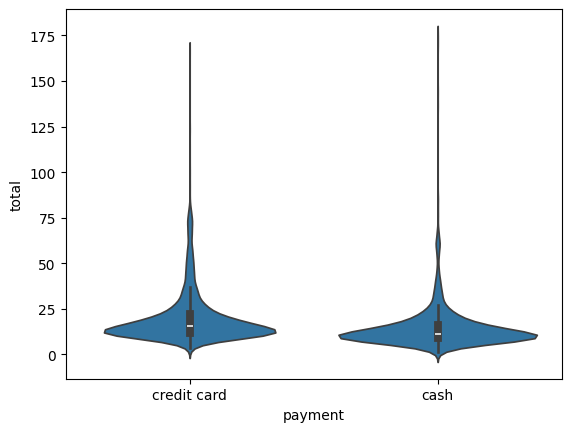

In [ ]:
#vionline plot for payment
sns.violinplot(x='payment', y='total', data=df)

Text(0, 0.5, 'Distance')

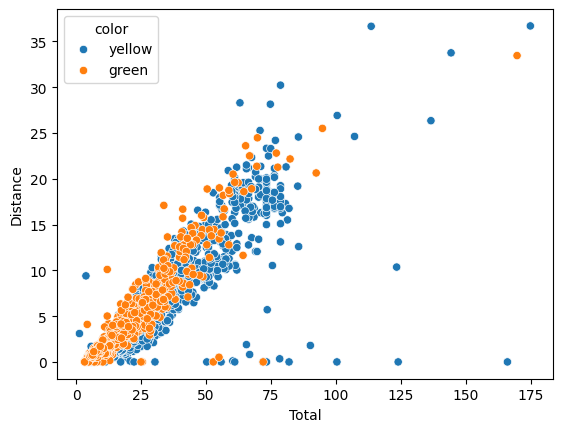

In [70]:
#scatter plot between total and distance
sns.scatterplot(data=df, x='total', y='distance', hue='color')
#labels in the axis
plt.xlabel('Total')
plt.ylabel('Distance')


<Axes: xlabel='pickup_borough', ylabel='tip'>

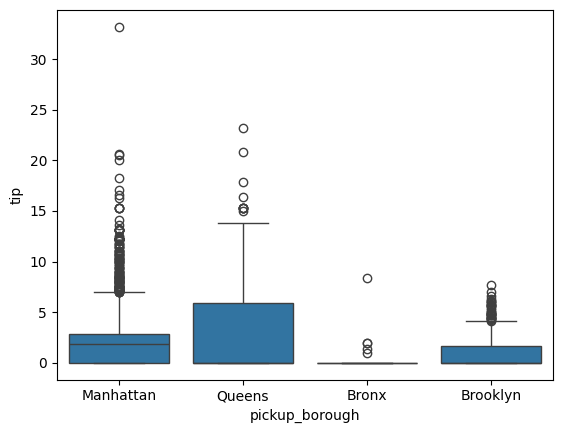

In [55]:
#vionline plot for payment
sns.boxplot(x='pickup_borough', y='tip', data=df)

<Axes: xlabel='dropoff_borough', ylabel='pickup_borough'>

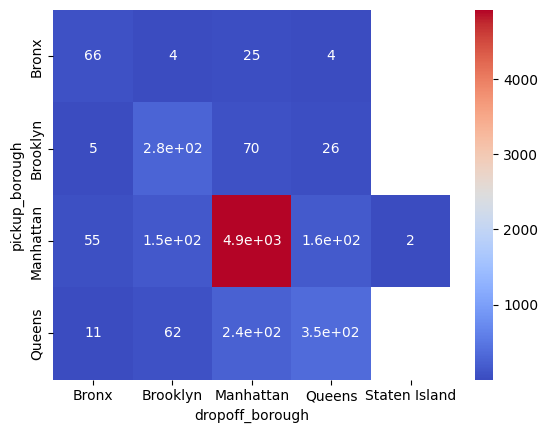

In [59]:
#heatmap between pickup and dropoff borough, by count
sns.heatmap(df.groupby(['pickup_borough', 'dropoff_borough']).size().unstack(), annot=True, cmap='coolwarm')

In [68]:
df[['total', 'distance', 'tip', 'tolls', 'fare', 'passengers']].corr()

total  distance       tip     tolls      fare  passengers
total       1.000000  0.904676  0.646186  0.683142  0.974358    0.015708
distance    0.904676  1.000000  0.452589  0.635267  0.920108    0.009411
tip         0.646186  0.452589  1.000000  0.413619  0.488612    0.021099
tolls       0.683142  0.635267  0.413619  1.000000  0.609307   -0.002903
fare        0.974358  0.920108  0.488612  0.609307  1.000000    0.007637
passengers  0.015708  0.009411  0.021099 -0.002903  0.007637    1.000000

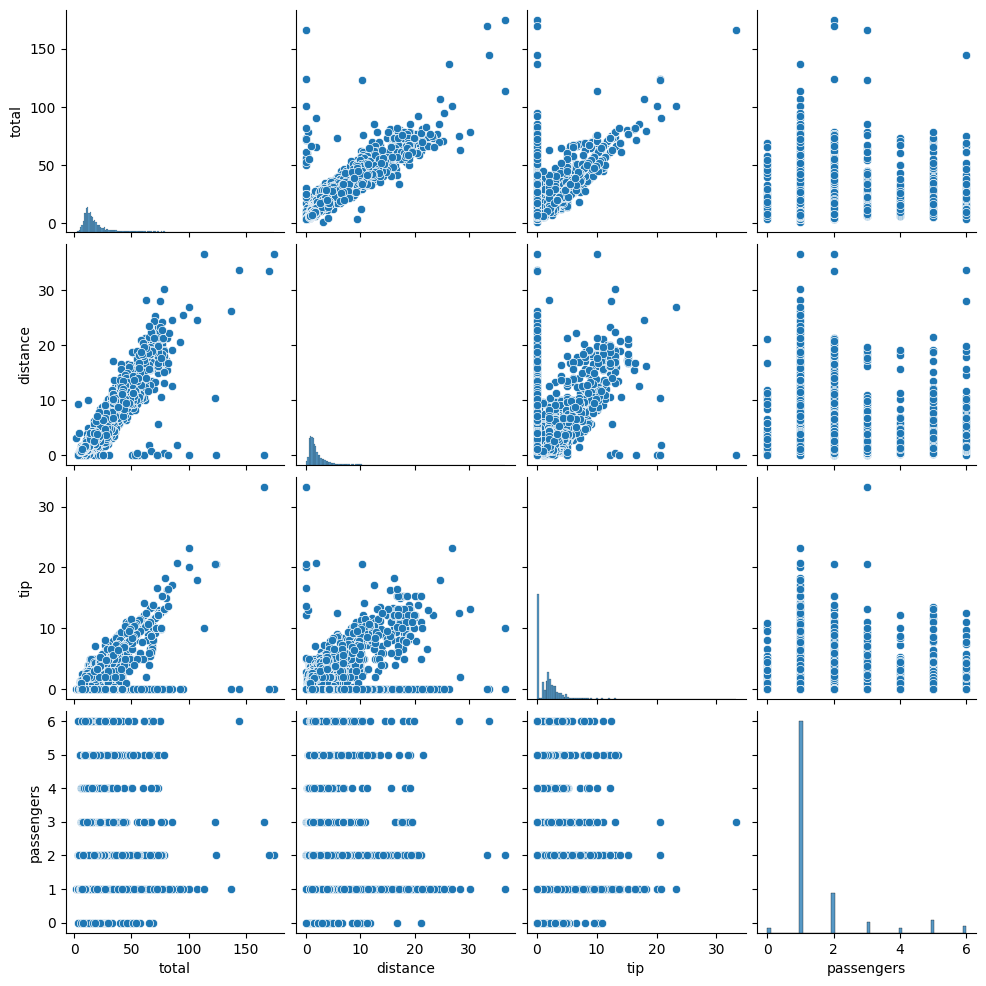

In [72]:
#fazer um pairplot 
sns.pairplot(df[['total', 'distance', 'tip', 'passengers']])

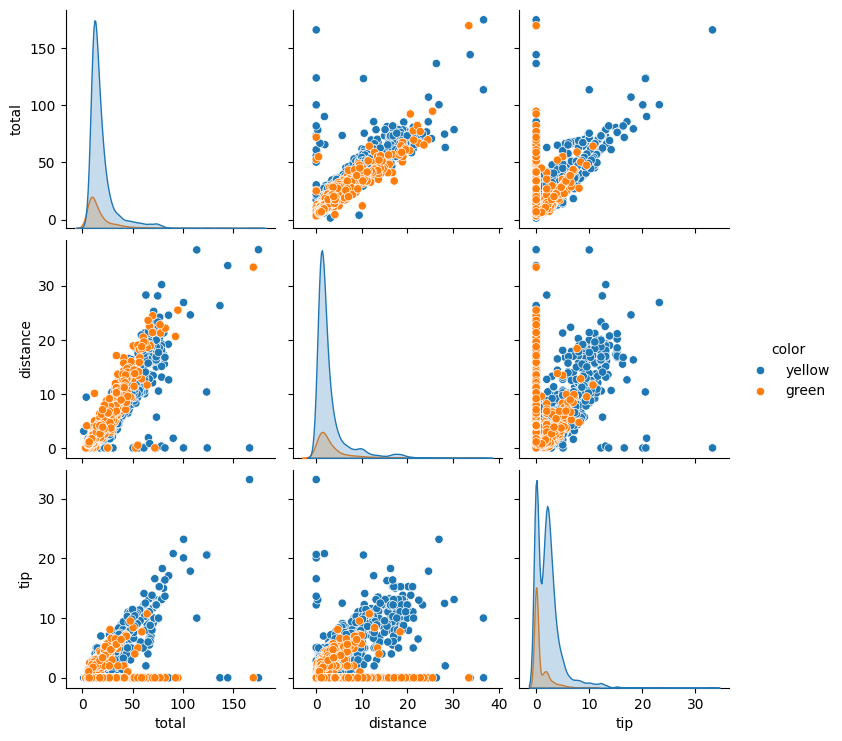

In [76]:
#pairplot with color and payment
sns.pairplot(data=df, vars=['total','distance','tip'], hue='color')


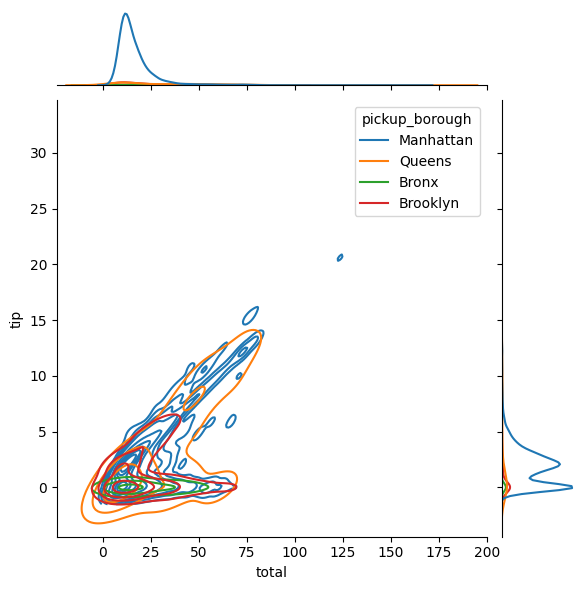

In [80]:
sns.jointplot(data=df, x='total', y='tip', kind='kde', hue='pickup_borough')

<Axes: xlabel='total', ylabel='Count'>

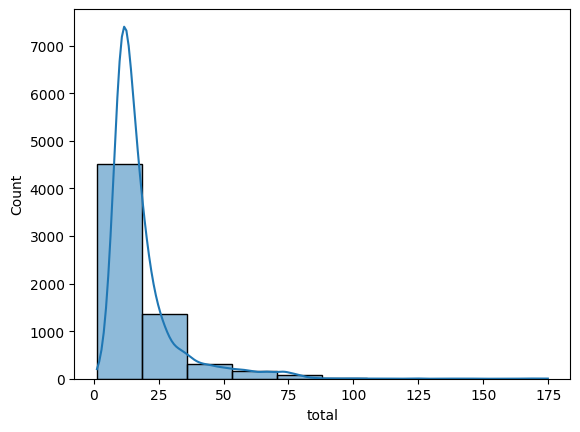

In [92]:
#histogram of total
sns.histplot(data=df, x='total', bins=10, kde=True,)

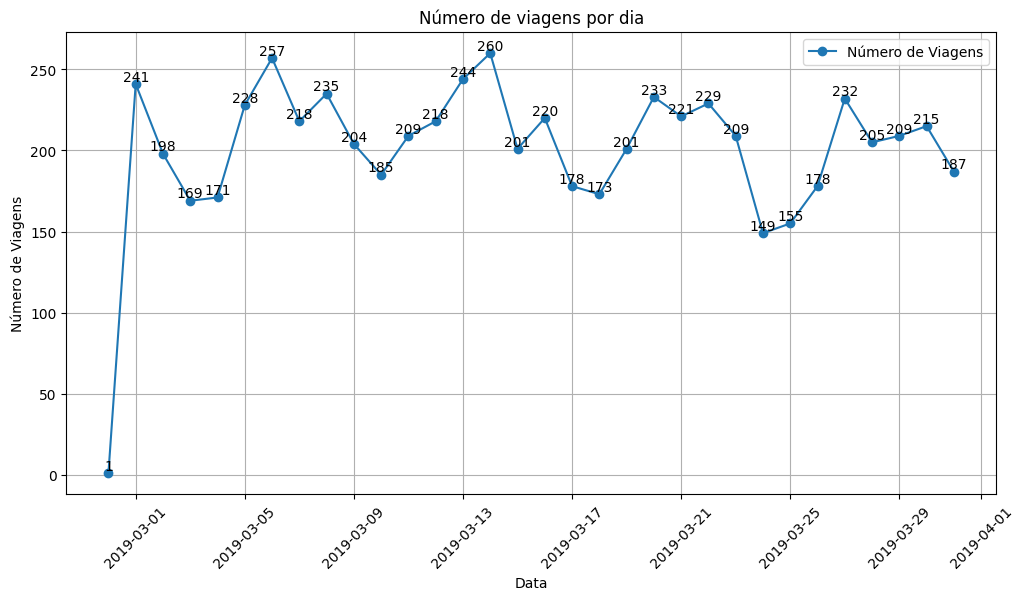

In [96]:
import matplotlib.pyplot as plt

# Contar ocorrências por dia
df_daily_counts = df['pickup_datetime'].dt.date.value_counts().sort_index()

# Criar gráfico de linhas
plt.figure(figsize=(12, 6))
ax = df_daily_counts.plot(kind='line', marker='o', label='Número de Viagens')

# Adicionar os valores em cada ponto
for x, y in zip(df_daily_counts.index, df_daily_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, color='black')

# Melhorar a visualização
plt.xlabel('Data')
plt.ylabel('Número de Viagens')
plt.title('Número de viagens por dia')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()


### Análise preditiva

In [134]:
#preparando as bases
df1 = df.drop(['pickup', 'dropoff', 'pickup_zone', 'dropoff_zone','pickup_datetime', 'dropoff_datetime','fare'], axis=1)

In [135]:
df1.columns

Index(['passengers', 'distance', 'tip', 'tolls', 'total', 'color', 'payment', 'pickup_borough', 'dropoff_borough'], dtype='object')

In [136]:
df2 = pd.get_dummies(df1, columns=['pickup_borough', 'dropoff_borough', 'payment', 'color'], drop_first=False, dtype='int')

In [137]:
#%% Separando as variáveis Y e X
X = df2.drop(['total'], axis=1)
y = df2['total']


In [138]:
#%% Separando as amostras de treino e teste

# Vamos escolher 70% das observações para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100)


In [139]:
#%%######################### Árvore de Decisão ################################
###############################################################################
#%% Gerando a árvore de decisão

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=100)
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2, random_state=100)

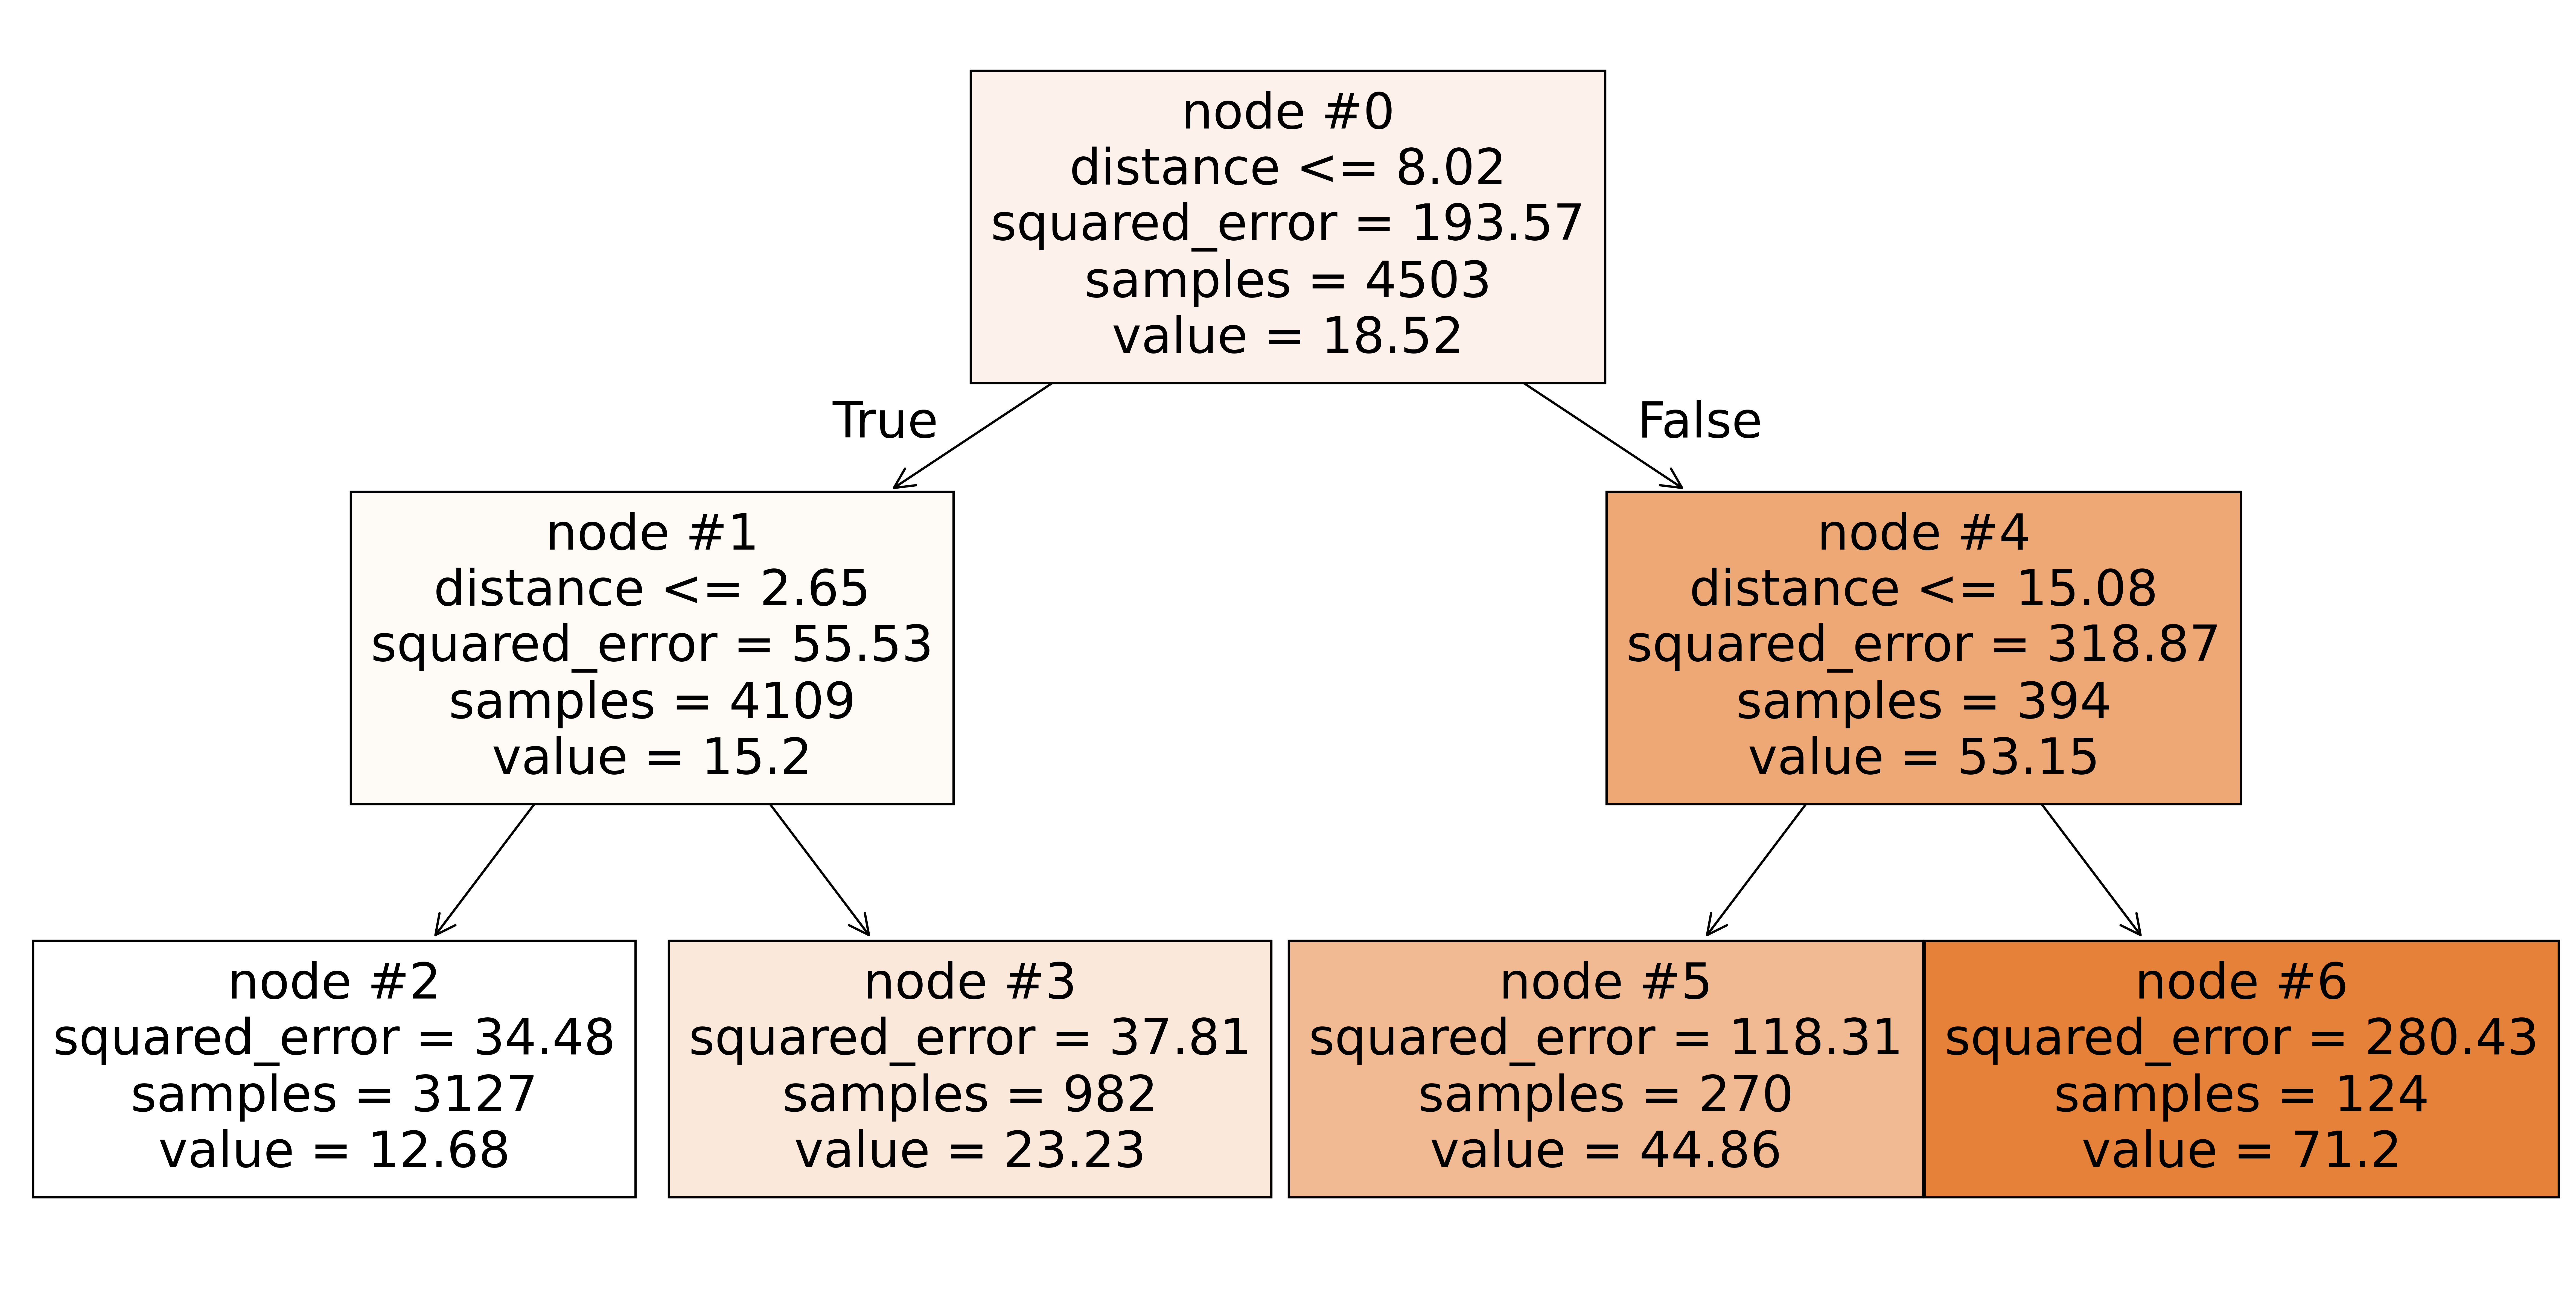

In [140]:
#%% Plotando a árvore

plt.figure(figsize=(20,10), dpi=600)
plot_tree(tree_reg,
          feature_names=X.columns.tolist(),
          filled=True,
          node_ids=True,
          precision=2)
plt.show()

In [141]:
#%% Analisando os resultados dos splits

tree_split = pd.DataFrame(tree_reg.cost_complexity_pruning_path(X_train, y_train))
tree_split.sort_index(ascending=False, inplace=True)

print(tree_split)


   ccp_alphas  impurities
3  114.992114  193.566841
2   18.482689   78.574728
1   13.084617   60.092038
0    0.000000   47.007421


In [142]:
tree_features = pd.DataFrame({'features':X.columns.tolist(),
                              'importance':tree_reg.feature_importances_})

print(tree_features)

                         features  importance
0                      passengers         0.0
1                        distance         1.0
2                             tip         0.0
3                           tolls         0.0
4            pickup_borough_Bronx         0.0
5         pickup_borough_Brooklyn         0.0
6        pickup_borough_Manhattan         0.0
7           pickup_borough_Queens         0.0
8           dropoff_borough_Bronx         0.0
9        dropoff_borough_Brooklyn         0.0
10      dropoff_borough_Manhattan         0.0
11         dropoff_borough_Queens         0.0
12  dropoff_borough_Staten Island         0.0
13                   payment_cash         0.0
14            payment_credit card         0.0
15                    color_green         0.0
16                   color_yellow         0.0


In [143]:
#%% Obtendo os valores preditos pelo modelo

# Base de treinamento
tree_pred_train = tree_reg.predict(X_train)

# Base de teste
tree_pred_test = tree_reg.predict(X_test)

In [144]:
#%% Avaliando o modelo (base de treino)

mse_train_tree = mean_squared_error(y_train, tree_pred_train)
mae_train_tree = mean_absolute_error(y_train, tree_pred_train)
r2_train_tree = r2_score(y_train, tree_pred_train)

print("Avaliação do Modelo (Base de Treino)")
print(f"MSE: {mse_train_tree:.1f}")
print(f"RMSE: {np.sqrt(mse_train_tree):.1f}")
print(f"MAE: {mae_train_tree:.1f}")
print(f"R²: {r2_train_tree:.1%}")

Avaliação do Modelo (Base de Treino)
MSE: 47.0
RMSE: 6.9
MAE: 4.0
R²: 75.7%


In [145]:
#%% Avaliando o modelo (base de testes)

mse_test_tree = mean_squared_error(y_test, tree_pred_test)
mae_test_tree = mean_absolute_error(y_test, tree_pred_test)
r2_test_tree = r2_score(y_test, tree_pred_test)

print("Avaliação do Modelo (Base de Teste)")
print(f"MSE: {mse_test_tree:.1f}")
print(f"RMSE: {np.sqrt(mse_test_tree):.1f}")
print(f"MAE: {mae_test_tree:.1f}")
print(f"R²: {r2_test_tree:.1%}")

Avaliação do Modelo (Base de Teste)
MSE: 46.8
RMSE: 6.8
MAE: 4.2
R²: 74.6%


In [151]:
#%% Alguns hiperparâmetros do modelo

# max_depth: profundidade máxima da árvore
# min_samples_split: qtde mínima de observações para dividir o nó
# min_samples_leaf: qtde mínima de observações para ser nó folha

# Vamos aplicar um Grid Search
param_grid_tree = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 20]
}

# Identificar o algoritmo em uso
tree_grid = DecisionTreeRegressor(random_state=100)

# Treinar os modelos para o grid search
tree_grid_model = GridSearchCV(estimator = tree_grid, 
                               param_grid = param_grid_tree,
                               scoring='neg_mean_squared_error', # Atenção à metrica de avaliação!
                               cv=5, verbose=2)

tree_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=3, min_samp

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=100),
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='neg_mean_squared_error', verbose=2)

In [147]:
# Verificando os melhores parâmetros obtidos
tree_grid_model.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}

In [148]:
# Gerando o modelo com os melhores hiperparâmetros
tree_best = tree_grid_model.best_estimator_


In [149]:
# Predict do modelo
tree_grid_pred_train = tree_best.predict(X_train)
tree_grid_pred_test = tree_best.predict(X_test)


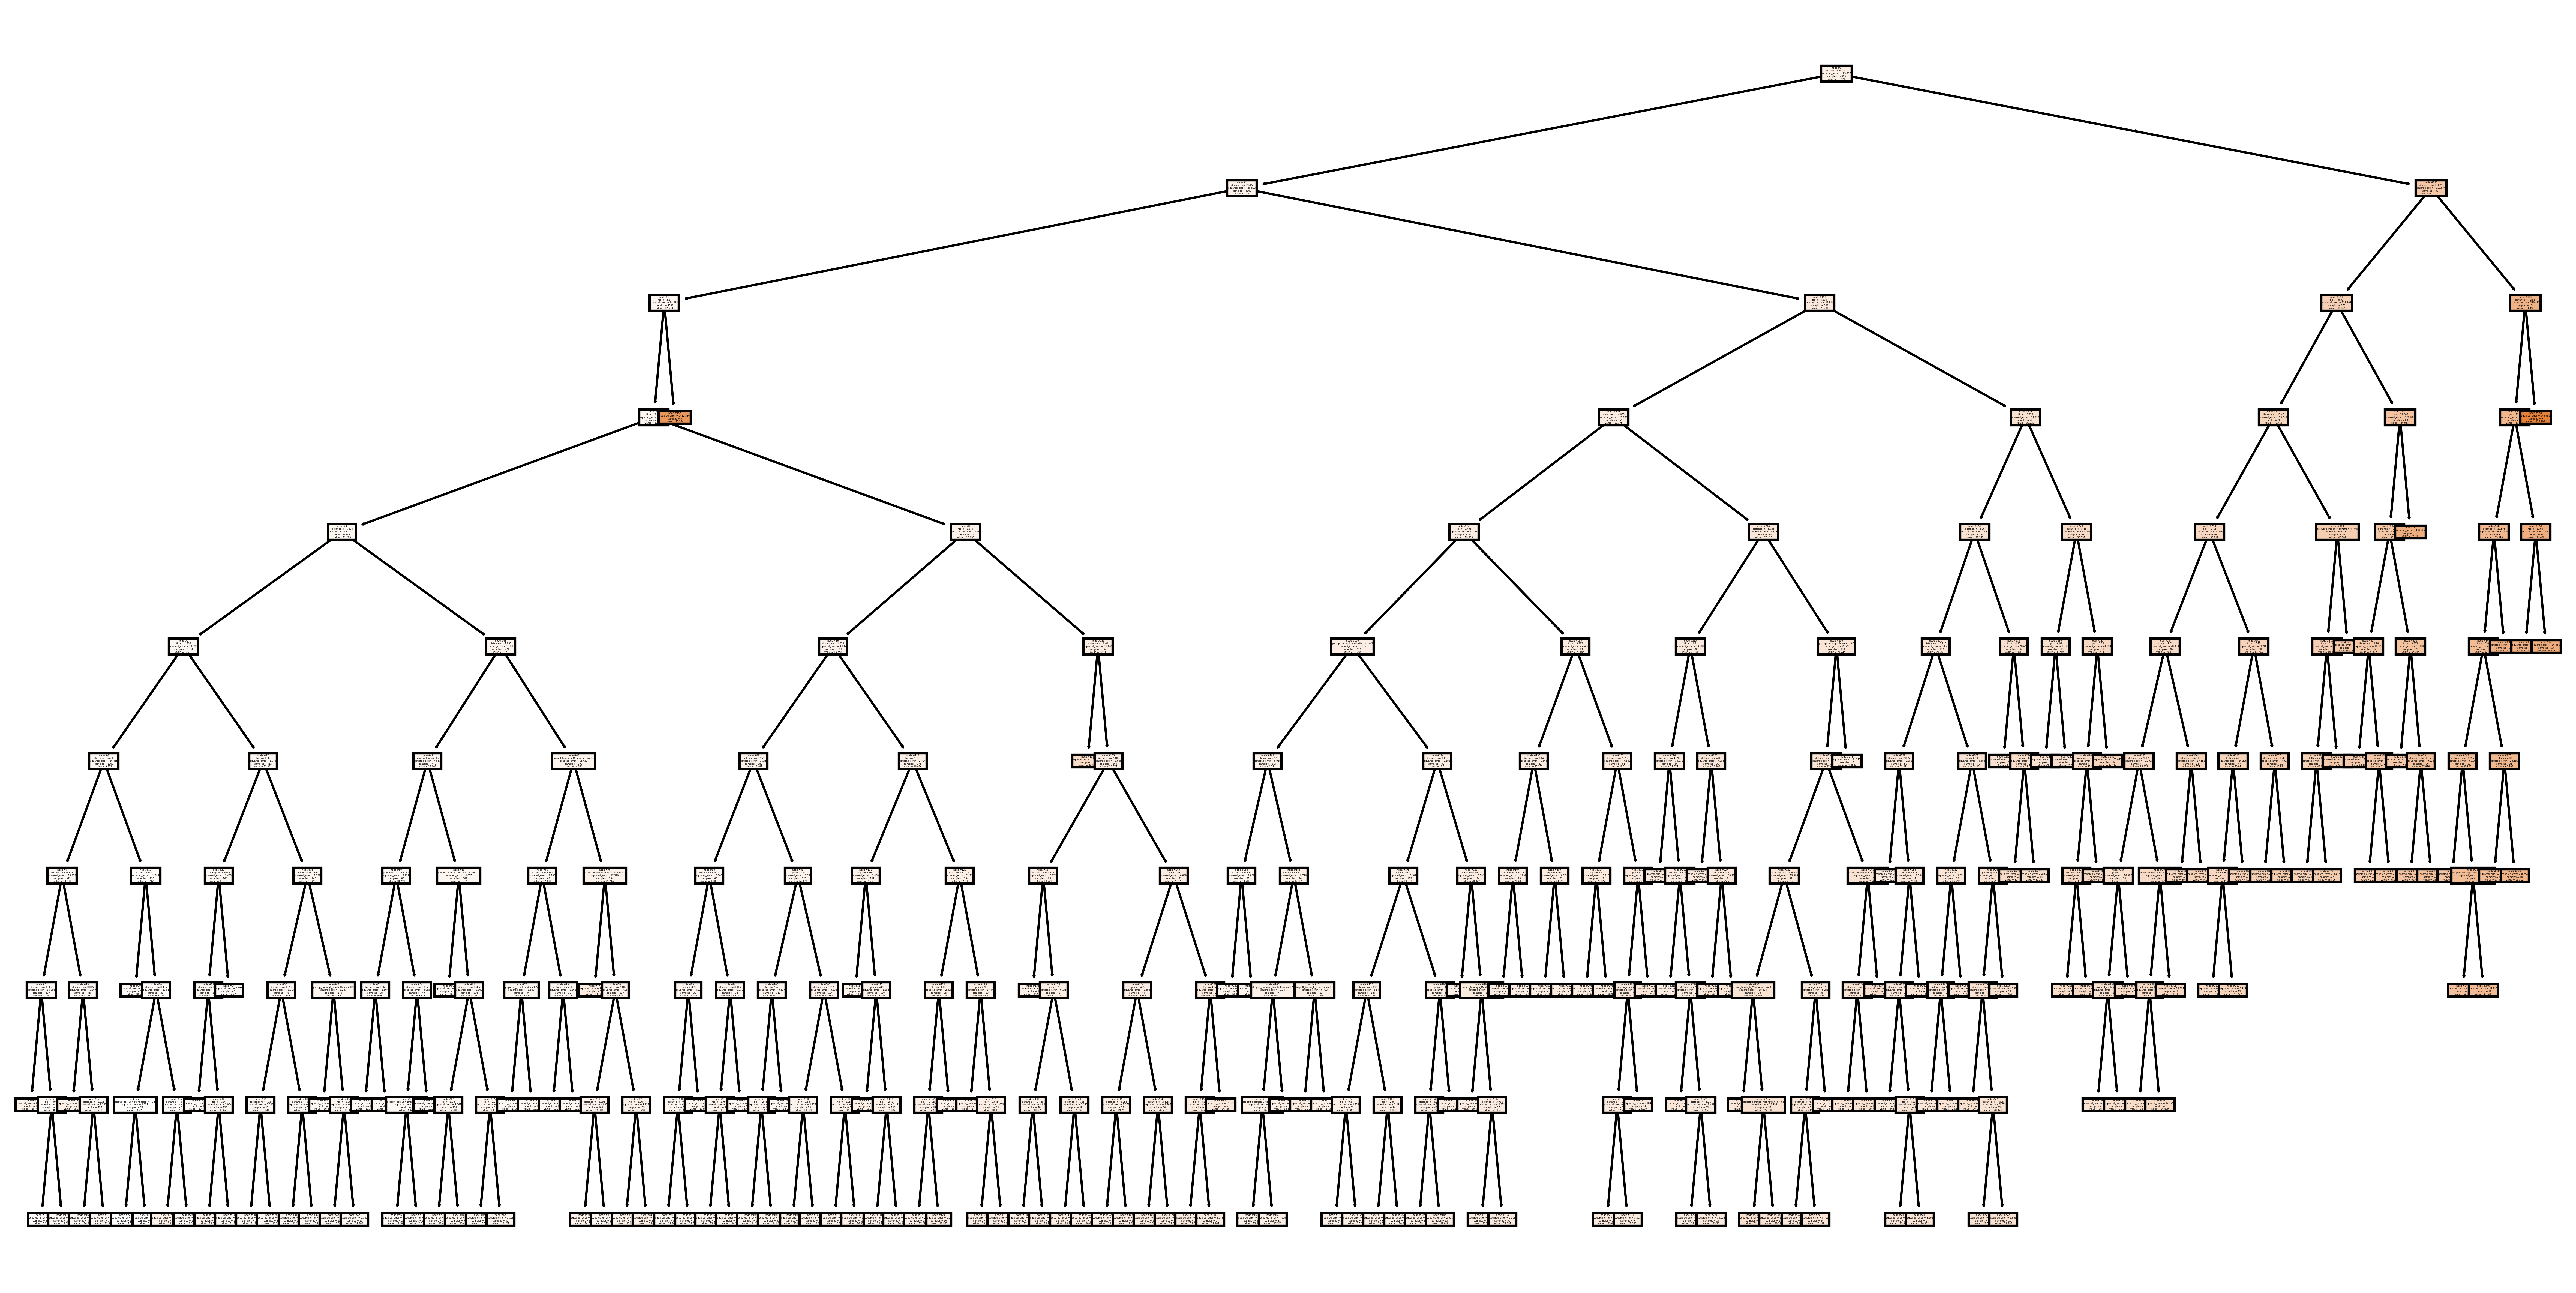

In [150]:
#%% Plotando a árvore após o grid search

plt.figure(figsize=(20,10), dpi=600)
plot_tree(tree_best,
          feature_names=X.columns.tolist(),
          filled=True,
          node_ids=True)
plt.show()

In [152]:
#%% Avaliando o novo modelo (base de treino)

mse_train_tree_grid = mean_squared_error(y_train, tree_grid_pred_train)
mae_train_tree_grid = mean_absolute_error(y_train, tree_grid_pred_train)
r2_train_tree_grid = r2_score(y_train, tree_grid_pred_train)

print("Avaliação do Modelo (Base de Treino)")
print(f"MSE: {mse_train_tree_grid:.1f}")
print(f"RMSE: {np.sqrt(mse_train_tree_grid):.1f}")
print(f"MAE: {mae_train_tree_grid:.1f}")
print(f"R²: {r2_train_tree_grid:.1%}")

Avaliação do Modelo (Base de Treino)
MSE: 13.8
RMSE: 3.7
MAE: 1.6
R²: 92.9%


In [153]:
#%% Avaliando o novo modelo (base de teste)

mse_test_tree_grid = mean_squared_error(y_test, tree_grid_pred_test)
mae_test_tree_grid = mean_absolute_error(y_test, tree_grid_pred_test)
r2_test_tree_grid = r2_score(y_test, tree_grid_pred_test)

print("Avaliação do Modelo (Base de Teste)")
print(f"MSE: {mse_test_tree_grid:.1f}")
print(f"RMSE: {np.sqrt(mse_test_tree_grid):.1f}")
print(f"MAE: {mae_test_tree_grid:.1f}")
print(f"R²: {r2_test_tree_grid:.1%}")

Avaliação do Modelo (Base de Teste)
MSE: 15.1
RMSE: 3.9
MAE: 1.8
R²: 91.8%


In [154]:
#%% Importância das variáveis preditoras

tree_features = pd.DataFrame({'features':X.columns.tolist(),
                              'importance':tree_best.feature_importances_}).sort_values(by='importance', ascending=False).reset_index(drop=True)

print(tree_features)

                         features  importance
0                        distance    0.869812
1                             tip    0.122465
2        pickup_borough_Manhattan    0.001786
3                           tolls    0.001710
4       dropoff_borough_Manhattan    0.001290
5                     color_green    0.001271
6                    color_yellow    0.000816
7            pickup_borough_Bronx    0.000286
8                    payment_cash    0.000220
9                      passengers    0.000134
10         dropoff_borough_Queens    0.000092
11        pickup_borough_Brooklyn    0.000064
12       dropoff_borough_Brooklyn    0.000050
13            payment_credit card    0.000006
14  dropoff_borough_Staten Island    0.000000
15          pickup_borough_Queens    0.000000
16          dropoff_borough_Bronx    0.000000


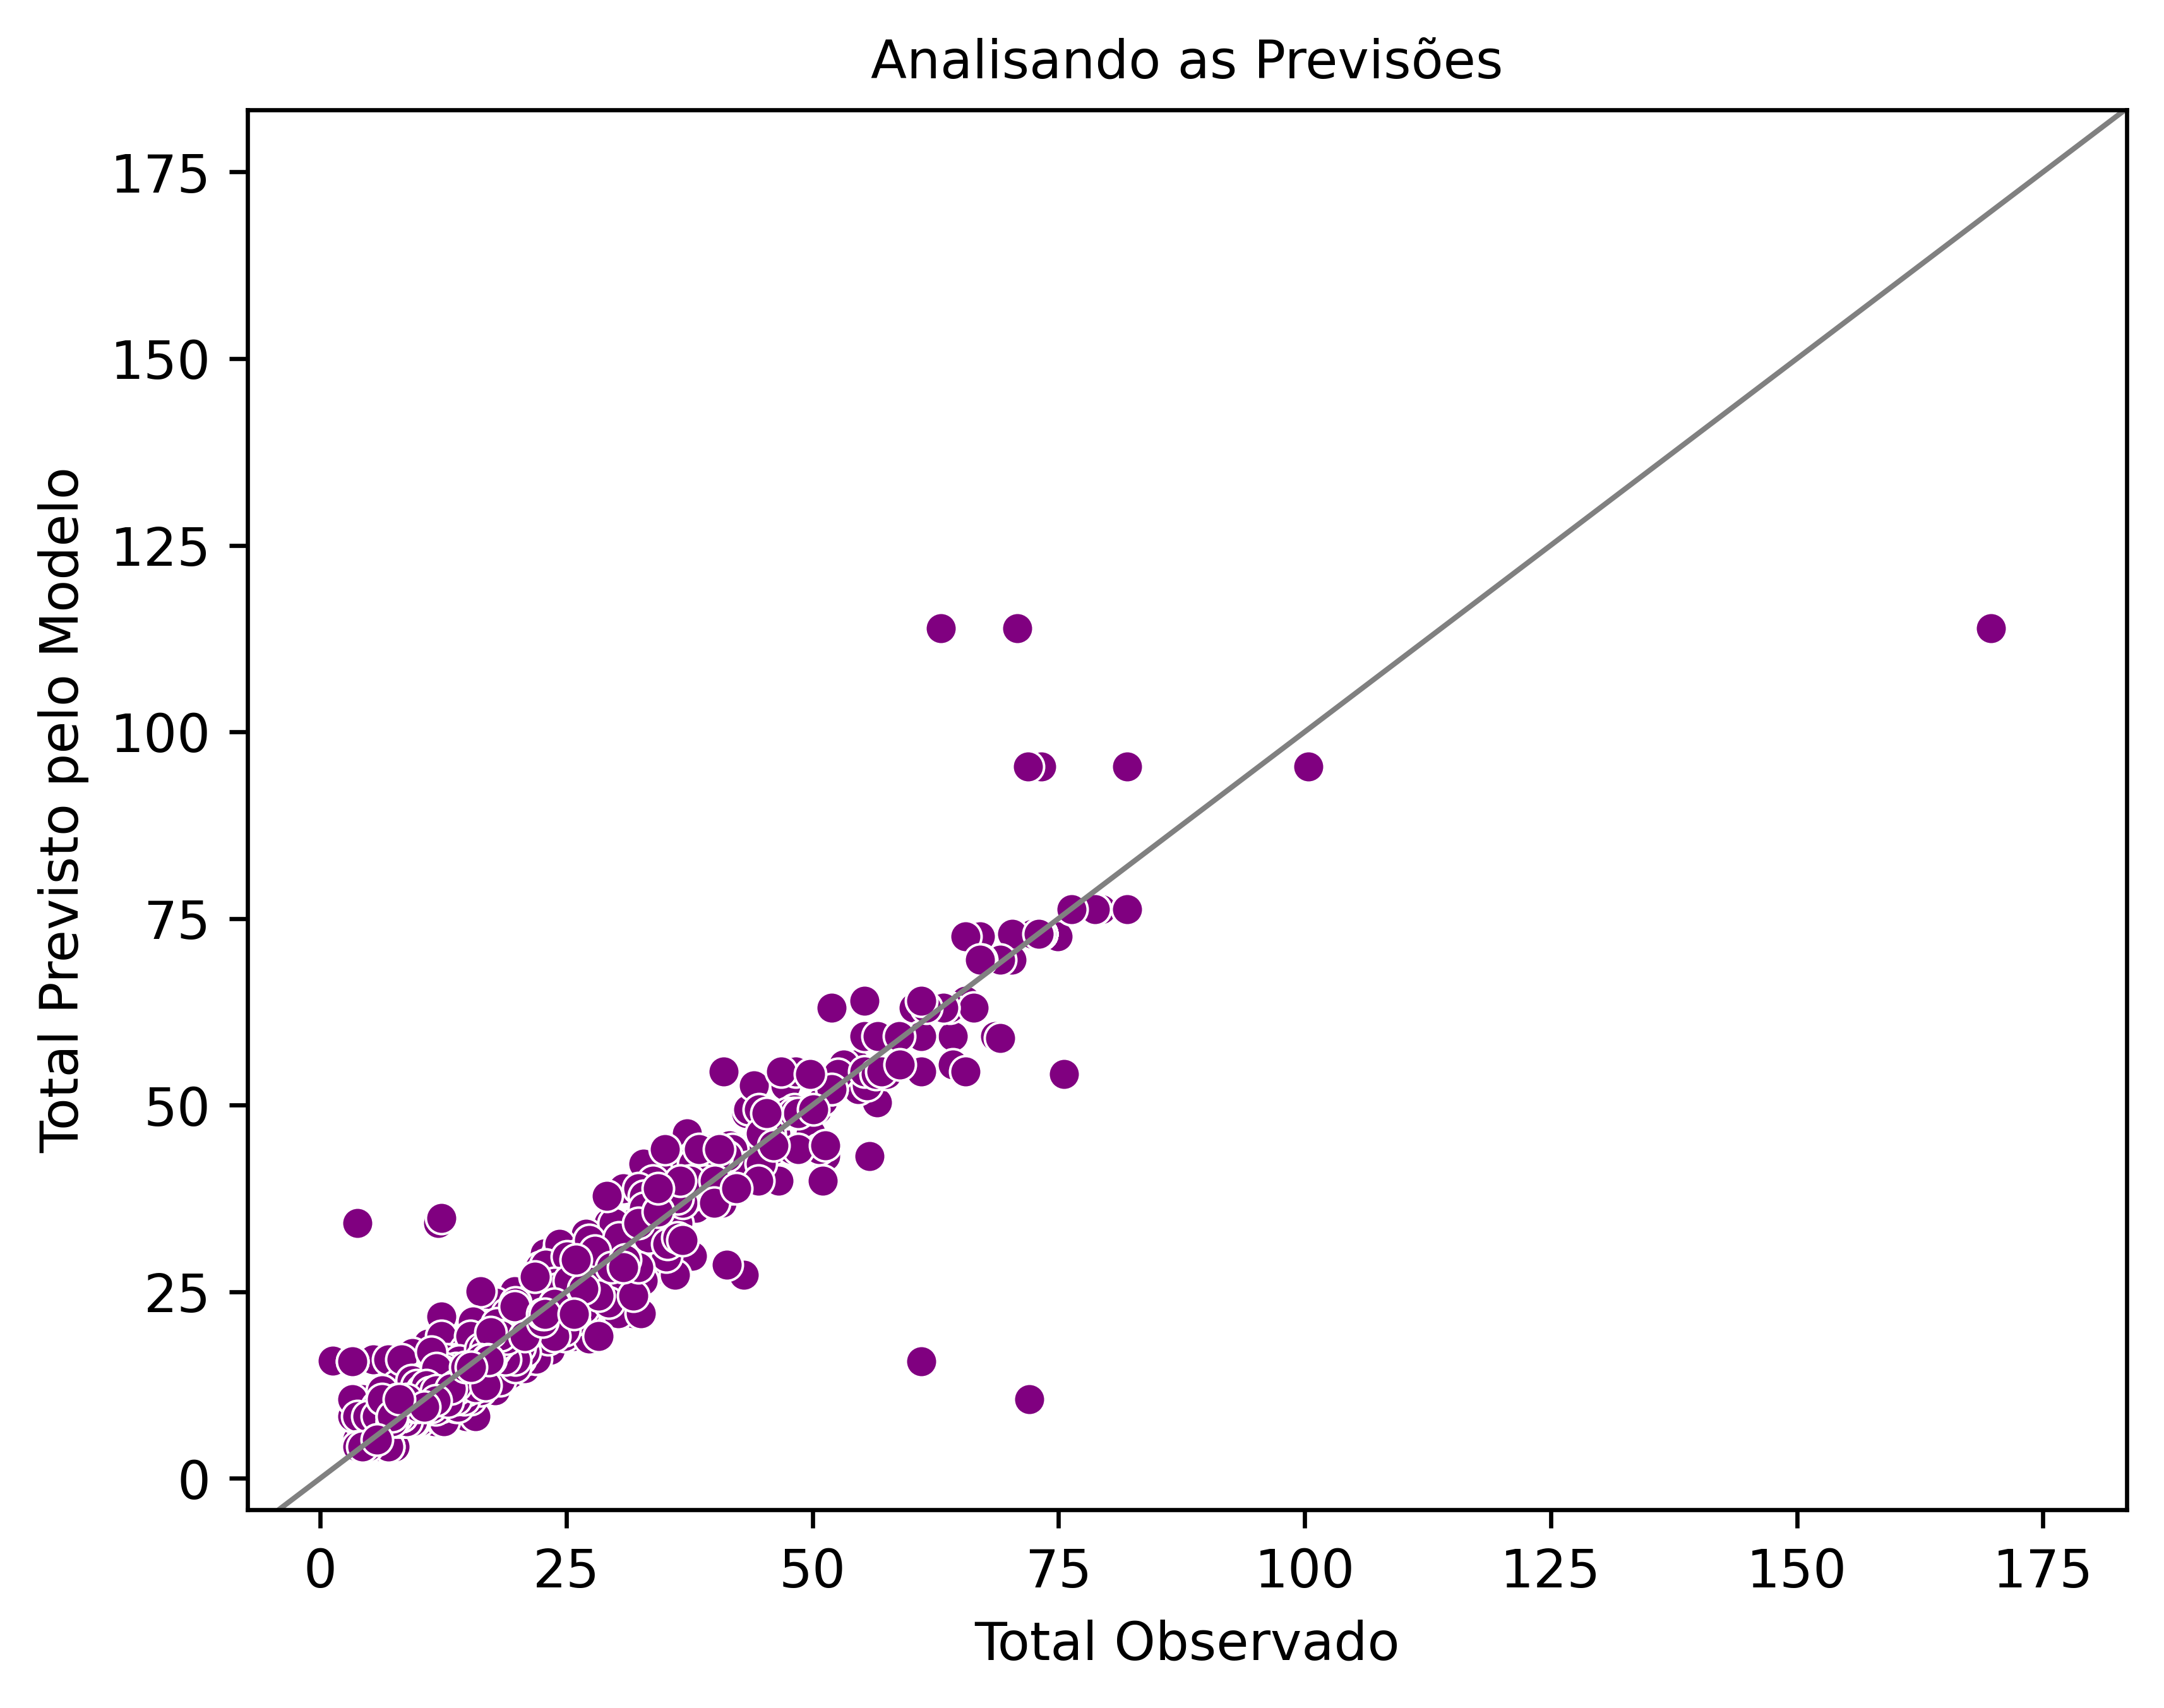

In [157]:
#%% Gráfico fitted values

# Valores preditos pelo modelo para as observações da amostra de teste
graph = pd.DataFrame({'Score': y_test,
                      'pred_tree': tree_grid_pred_test})

plt.figure(dpi=600)
sns.scatterplot(data=graph, x='Score', y='pred_tree', color='purple')
plt.title('Analisando as Previsões', fontsize=10)
plt.xlabel('Total Observado', fontsize=10)
plt.ylabel('Total Previsto pelo Modelo', fontsize=10)
plt.axline((25, 25), (max(df2['total']), max(df2['total'])), linewidth=1, color='grey')
plt.show()

In [158]:
###############################################################################
######################### Random Forest #######################################

param_grid_rf = {
    'n_estimators': [100, 500],
    'max_depth': [5, 10],
    'max_features': [3, 5, 7],
    'min_samples_leaf': [30, 50]
}

# Identificar o algoritmo em uso
rf_grid = RandomForestRegressor(random_state=100)

# Treinar os modelos para o grid search
rf_grid_model = GridSearchCV(estimator = rf_grid, 
                             param_grid = param_grid_rf,
                             scoring='neg_mean_squared_error', # Atenção à metrica de avaliação!
                             cv=5, verbose=2)

rf_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=5, max_features=3, min_samples_leaf=30, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=3, min_samples_leaf=30, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=3, min_samples_leaf=30, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=3, min_samples_leaf=30, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=3, min_samples_leaf=30, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=3, min_samples_leaf=30, n_estimators=500; total time=   0.6s
[CV] END max_depth=5, max_features=3, min_samples_leaf=30, n_estimators=500; total time=   0.7s
[CV] END max_depth=5, max_features=3, min_samples_leaf=30, n_estimators=500; total time=   0.7s
[CV] END max_depth=5, max_features=3, min_samples_leaf=30, n_estimators=500; total time=   0.6s
[CV] END max_depth=5, max_features=3, min_samples_leaf=30, n_estimators=50

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=100),
             param_grid={'max_depth': [5, 10], 'max_features': [3, 5, 7],
                         'min_samples_leaf': [30, 50],
                         'n_estimators': [100, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [159]:
# Verificando os melhores parâmetros obtidos
rf_grid_model.best_params_

{'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 30,
 'n_estimators': 100}

In [160]:
# Gerando o modelo com os melhores hiperparâmetros
rf_best = rf_grid_model.best_estimator_

In [161]:
# Predict do modelo
rf_grid_pred_train = rf_best.predict(X_train)
rf_grid_pred_test = rf_best.predict(X_test)

In [162]:
rf_features = pd.DataFrame({'features':X.columns.tolist(),
                            'importance':np.round(rf_best.feature_importances_, 4)}).sort_values(by='importance', ascending=False).reset_index(drop=True)

print(rf_features)

                         features  importance
0                        distance      0.5689
1                             tip      0.1983
2                           tolls      0.1829
3           pickup_borough_Queens      0.0137
4        pickup_borough_Manhattan      0.0105
5       dropoff_borough_Manhattan      0.0075
6                     color_green      0.0045
7             payment_credit card      0.0033
8                    color_yellow      0.0030
9          dropoff_borough_Queens      0.0030
10                   payment_cash      0.0025
11       dropoff_borough_Brooklyn      0.0011
12        pickup_borough_Brooklyn      0.0004
13                     passengers      0.0002
14          dropoff_borough_Bronx      0.0001
15  dropoff_borough_Staten Island      0.0000
16           pickup_borough_Bronx      0.0000


In [163]:
#avalicao do modelo treino
mse_train_rf_grid = mean_squared_error(y_train, rf_grid_pred_train)
mae_train_rf_grid = mean_absolute_error(y_train, rf_grid_pred_train)
r2_train_rf_grid = r2_score(y_train, rf_grid_pred_train)

print("Avaliação do Modelo (Base de Treino)")
print(f"MSE: {mse_train_rf_grid:.1f}")
print(f"RMSE: {np.sqrt(mse_train_rf_grid):.1f}")
print(f"MAE: {mae_train_rf_grid:.1f}")
print(f"R²: {r2_train_rf_grid:.1%}")


Avaliação do Modelo (Base de Treino)
MSE: 25.4
RMSE: 5.0
MAE: 2.0
R²: 86.9%


In [164]:
#avaliacao do modelo teste
mse_test_rf_grid = mean_squared_error(y_test, rf_grid_pred_test)
mae_test_rf_grid = mean_absolute_error(y_test, rf_grid_pred_test)
r2_test_rf_grid = r2_score(y_test, rf_grid_pred_test)

print("Avaliação do Modelo (Base de Teste)")
print(f"MSE: {mse_test_rf_grid:.1f}")
print(f"RMSE: {np.sqrt(mse_test_rf_grid):.1f}")
print(f"MAE: {mae_test_rf_grid:.1f}")
print(f"R²: {r2_test_rf_grid:.1%}")

Avaliação do Modelo (Base de Teste)
MSE: 20.9
RMSE: 4.6
MAE: 2.0
R²: 88.7%


In [165]:
###################################################################
############################### XGboost ###########################
param_grid_xgb = {
    'n_estimators': [100, 500, 700],
    'max_depth': [3, 5],
    'learning_rate': [0.001, 0.01, 0.1],
    'colsample_bytree': [0.5, 0.8],
}

# Identificar o algoritmo em uso
xgb_grid = XGBRegressor(random_state=100)

# Treinar os modelos para o grid search
xgb_grid_model = GridSearchCV(estimator = xgb_grid, 
                             param_grid = param_grid_xgb,
                             scoring='neg_mean_squared_error', # Atenção à metrica de avaliação!
                             cv=5, verbose=2)

xgb_grid_model.fit(X_train, y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END colsample_bytree=0.5, learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.001, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.001, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.001, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.001, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.001, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END colsample_b

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=100, ...),
             param_grid={'colsample_bytree': [0.5, 0.8],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5], 'n_estimators': [100, 500, 700]},
             scoring='neg_mean_squared_error', verbose=2)

In [166]:
# Verificando os melhores parâmetros obtidos
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 500}

In [167]:
# Gerando o modelo com os melhores hiperparâmetros
xgb_best = xgb_grid_model.best_estimator_

In [168]:

# Predict do modelo
xgb_grid_pred_train = xgb_best.predict(X_train)
xgb_grid_pred_test = xgb_best.predict(X_test)

In [169]:
xgb_features = pd.DataFrame({'features':X.columns.tolist(),
                             'importance':np.round(xgb_best.feature_importances_, 4)}).sort_values(by='importance', ascending=False).reset_index(drop=True)

print(xgb_features)

                         features  importance
0          dropoff_borough_Queens      0.2130
1                           tolls      0.1484
2                             tip      0.1320
3                        distance      0.1288
4           pickup_borough_Queens      0.0727
5                     color_green      0.0687
6        pickup_borough_Manhattan      0.0514
7       dropoff_borough_Manhattan      0.0488
8                    payment_cash      0.0318
9        dropoff_borough_Brooklyn      0.0312
10            payment_credit card      0.0228
11          dropoff_borough_Bronx      0.0145
12  dropoff_borough_Staten Island      0.0126
13        pickup_borough_Brooklyn      0.0088
14                     passengers      0.0067
15                   color_yellow      0.0054
16           pickup_borough_Bronx      0.0023


In [ ]:
#Avaliação do treino
mse_train_xgb_grid = mean_squared_error(y_train, xgb_grid_pred_train)
mae_train_xgb_grid = mean_absolute_error(y_train, xgb_grid_pred_train)
r2_train_xgb_grid = r2_score(y_train, xgb_grid_pred_train)

print("Avaliação do Modelo (Base de Treino)")
print(f"MSE: {mse_train_xgb_grid:.1f}")
print(f"RMSE: {np.sqrt(mse_train_xgb_grid):.1f}")
print(f"MAE: {mae_train_xgb_grid:.1f}")
print(f"R²: {r2_train_xgb_grid:.1%}")

Avaliação do Modelo (Base de Treino)
MSE: 7.5
RMSE: 2.7
MAE: 1.5
R²: 96.1%


In [ ]:
#avaliação do treino
mse_test_xgb_grid = mean_squared_error(y_test, xgb_grid_pred_test)
mae_test_xgb_grid = mean_absolute_error(y_test, xgb_grid_pred_test)
r2_test_xgb_grid = r2_score(y_test, xgb_grid_pred_test)

print("Avaliação do Modelo (Base de Teste)")
print(f"MSE: {mse_test_xgb_grid:.1f}")
print(f"RMSE: {np.sqrt(mse_test_xgb_grid):.1f}")
print(f"MAE: {mae_test_xgb_grid:.1f}")
print(f"R²: {r2_test_xgb_grid:.1%}")

Avaliação do Modelo (Base de Teste)
MSE: 14.5
RMSE: 3.8
MAE: 1.8
R²: 92.1%


In [177]:
# Create SHAP explainer
explainer = shap.Explainer(xgb_best)

# Calculate SHAP values
shap_values = explainer(X_test)

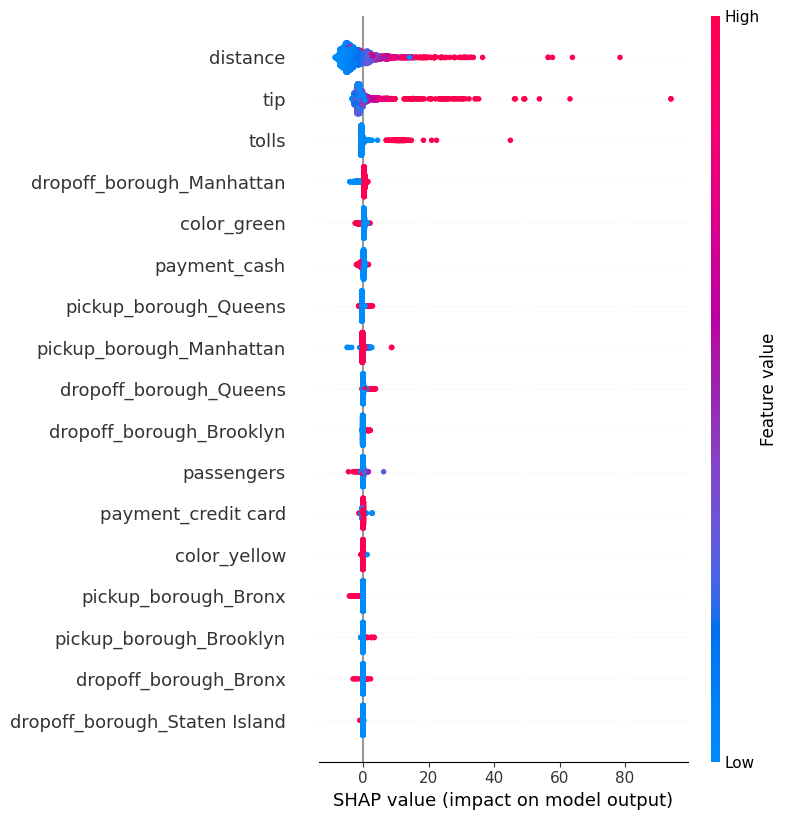

In [178]:
shap.summary_plot(shap_values, X_test)


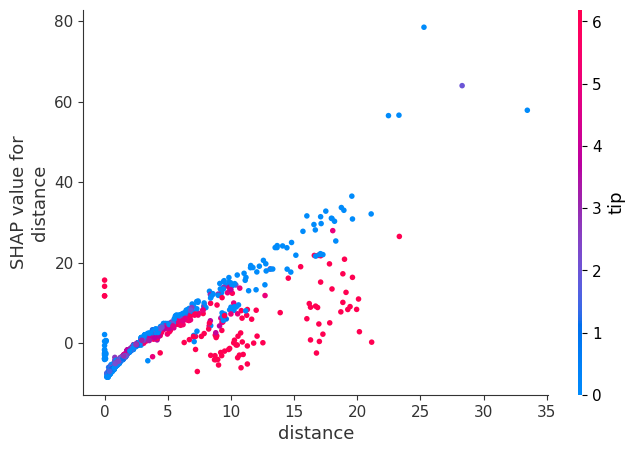

In [181]:
shap.dependence_plot(1, shap_values.values, X_test)


In [180]:
shap.initjs()

# Convert SHAP Explanation object to raw values
shap.force_plot(
    explainer.expected_value,  # Model's base value (mean prediction)
    shap_values.values[0],  # SHAP values for the first instance
    X_test.iloc[0]  # Feature values for the first instance
)